In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly as py
import os
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
df = pd.read_csv(os.path.join('Resources/heart.csv'))
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
columns = list(df.columns)
columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.shape

(303, 14)

In [7]:
# Use Pandas get_dummies to convert categorical data
dummies = pd.get_dummies(df)
dummies.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
X = dummies.drop('target', axis=1)
y = dummies['target']
print(X.shape, y.shape)

(303, 13) (303,)


# Logistic Regression

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
accuracies = {}
model.fit(X_train, y_train)
acc = model.score(X_test,y_test)*100
accuracies['Logistic Regression'] = acc

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.8546255506607929
Testing Data Score: 0.868421052631579


In [13]:
predictions = model.predict(X_test)
print(f"Predictions of heart disease:   {predictions[:]}")
print(f"Actual heart disease: {y_test[:].tolist()}")

Predictions of heart disease:   [0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1
 0 1]
Actual heart disease: [0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]


In [14]:
pd.DataFrame({"Predictions of Heart Disease": predictions, "Actual Heart Disease": y_test}).reset_index(drop=True)

,Predictions of Heart Disease,Actual Heart Disease
0,0,0
1,1,0
2,1,1
3,0,0
4,1,1
...,...,...
71,1,1
72,1,0
73,1,1
74,0,0


# KNeighborsClassifier and Confusion Matrix

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

k: 1, Train/Test Score: 1.000/0.605
k: 3, Train/Test Score: 0.771/0.671
k: 5, Train/Test Score: 0.758/0.697
k: 7, Train/Test Score: 0.727/0.724
k: 9, Train/Test Score: 0.722/0.711
k: 11, Train/Test Score: 0.731/0.750
k: 13, Train/Test Score: 0.709/0.711
k: 15, Train/Test Score: 0.696/0.684
k: 17, Train/Test Score: 0.696/0.724
k: 19, Train/Test Score: 0.692/0.737


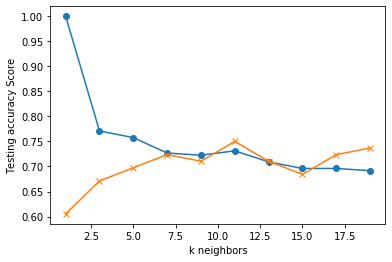

In [16]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [17]:
# k: 11 seems to be the best choice for this dataset
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)
print('k=11 Test Acc: %.3f' % model.score(X_test, y_test))

k=11 Test Acc: 0.750


In [18]:
knn_model=KNeighborsClassifier(n_neighbors=11).fit(X_train,y_train)
knn_predictions=knn_model.predict(X_test)

In [19]:
# build confusion matrix
from sklearn import metrics
cnf_mtr = metrics.confusion_matrix(y_test, knn_predictions)
cnf_mtr

array([[23, 12],
       [ 7, 34]])

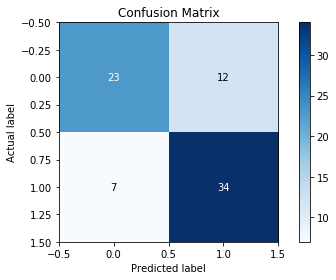

In [20]:
cm = confusion_matrix(y_test, knn_predictions)
classes = unique_labels(y_test, knn_predictions)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

   
ax.set(title='Confusion Matrix',
       ylabel='Actual label',
       xlabel='Predicted label')

fmt = 'd'
thresh = cm.max() / 2.

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

In [21]:
#Try to find best value
k_range = range(1, 24)
scores = []
from sklearn import metrics
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.6052631578947368, 0.6052631578947368, 0.6710526315789473, 0.6973684210526315, 0.6973684210526315, 0.7105263157894737, 0.7236842105263158, 0.7236842105263158, 0.7105263157894737, 0.7368421052631579, 0.75, 0.7105263157894737, 0.7105263157894737, 0.6973684210526315, 0.6842105263157895, 0.7236842105263158, 0.7236842105263158, 0.7236842105263158, 0.7368421052631579, 0.7236842105263158, 0.7368421052631579, 0.7368421052631579, 0.75]


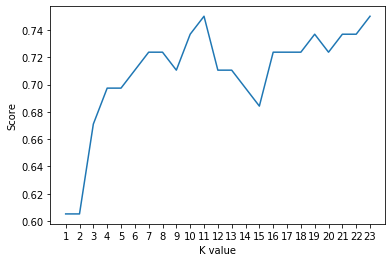

The accuracy score achieved using KNN is 75.00%


In [22]:
plt.plot(range(1,24), scores)
plt.xticks(np.arange(1,24,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

scoreList = []
scoreList.append(model.score(X_test, y_test))
acc = max(scoreList)*100
accuracies['KNeighborsClassifier'] = acc
print("The accuracy score achieved using KNN is {:.2f}%".format(acc))

# Random Forest Classification

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 1000, random_state = 1)
model.fit(X_train, y_train)
acc = model.score(X_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Classification Score : {:.2f}%".format(acc))

Random Forest Classification Score : 84.21%


# Grid Search

In [24]:
dummies.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
feature_cols = ['age','sex','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','ca', 'slope', 'thal']
data = dummies[feature_cols]
target = dummies.target

In [26]:
data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,slope,thal
0,63,1,145,233,1,0,150,0,2.3,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2
2,41,0,130,204,0,0,172,0,1.4,0,2,2
3,56,1,120,236,0,1,178,0,0.8,0,2,2
4,57,0,120,354,0,1,163,1,0.6,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,1,3
299,45,1,110,264,0,1,132,0,1.2,0,1,3
300,68,1,144,193,1,1,141,0,3.4,2,1,3
301,57,1,130,131,0,1,115,1,1.2,1,1,3


In [27]:
target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=43)

In [29]:
from sklearn.svm import SVC 
model = SVC()
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],'gamma': [0.01, 0.001, 1e-05]}
model = GridSearchCV(model, param_grid, verbose=3)

In [31]:
# Fit the model using the grid search estimator. 
model.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.553, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.592, total=   0.0s
[CV] C=1, gamma=0.01 .................................................


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=1, gamma=0.01, score=0.547, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.658, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.605, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.707, total=   0.0s
[CV] C=1, gamma=1e-05 ................................................
[CV] .................... C=1, gamma=1e-05, score=0.605, total=   0.0s
[CV] C=1, gamma=1e-05 ................................................
[CV] .................... C=1, gamma=1e-05, score=0.553, total=   0.0s
[CV] C=1, gamma=1e-05 ................................................
[CV] .................... C=1, gamma=1e-05, score=0.680, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.2s finished
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.01, 0.001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [32]:
acc = model.score(X_test,y_test)*100
accuracies['GridSearchSV'] = acc
print(model.best_params_)
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

{'C': 5, 'gamma': 0.001}
Test Accuracy of SVM Algorithm: 68.42%


In [33]:
predictions = model.predict(X_test)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=[ "No disease", "Disease"]))

              precision    recall  f1-score   support

  No disease       0.69      0.61      0.65        36
     Disease       0.68      0.75      0.71        40

    accuracy                           0.68        76
   macro avg       0.68      0.68      0.68        76
weighted avg       0.68      0.68      0.68        76



# Deep Learning with PyTorch

In [35]:
#!conda install numpy pytorch torchvision cpuonly -c pytorch -y

In [36]:
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
import torchvision
from torchvision.datasets.utils import download_url

In [37]:
dummies.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
num_rows = dummies.shape[0]
print(num_rows)

303


In [39]:
num_cols = dummies.shape[1]
print(num_cols)

14


In [40]:
input_cols = [col for col in dummies.columns[:-1]]
input_cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [41]:
categorical_cols = [col for col in dummies.select_dtypes(exclude=["number"]).columns.values]
categorical_cols

[]

In [42]:
output_cols = [dummies.columns[-1]]
output_cols

['target']

Minimum: 0.00
Maximum: 1.00
Average: 0.54


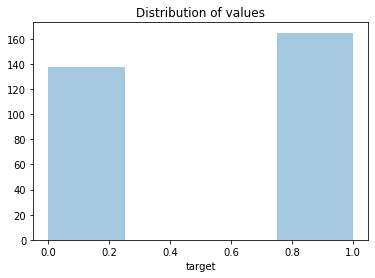

In [43]:
output = dummies[output_cols[0]]
print ('Minimum: {:.2f}'.format(output.min()))
print ('Maximum: {:.2f}'.format(output.max()))
print ('Average: {:.2f}'.format(output.mean()))
plt.title("Distribution of values")

sns.distplot(dummies.target, kde=False)

In [44]:
def dummies_to_arrays(dummies):
    dataframe = dummies.copy(deep=True)
    for col in categorical_cols:
        dataframe[col] = dataframe[col].astype('target').cat.codes
    inputs_array = dataframe[input_cols].to_numpy()
    targets_array = dataframe[output_cols].to_numpy()
    return inputs_array, targets_array

In [45]:
inputs_array, targets_array = dummies_to_arrays(dummies)
inputs_array, targets_array

(array([[63.,  1.,  3., ...,  0.,  0.,  1.],
        [37.,  1.,  2., ...,  0.,  0.,  2.],
        [41.,  0.,  1., ...,  2.,  0.,  2.],
        ...,
        [68.,  1.,  0., ...,  1.,  2.,  3.],
        [57.,  1.,  0., ...,  1.,  1.,  3.],
        [57.,  0.,  1., ...,  1.,  1.,  2.]]), array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
 

In [46]:
inputs = torch.from_numpy(inputs_array).type(torch.float32)
inputs

tensor([[63.,  1.,  3.,  ...,  0.,  0.,  1.],
        [37.,  1.,  2.,  ...,  0.,  0.,  2.],
        [41.,  0.,  1.,  ...,  2.,  0.,  2.],
        ...,
        [68.,  1.,  0.,  ...,  1.,  2.,  3.],
        [57.,  1.,  0.,  ...,  1.,  1.,  3.],
        [57.,  0.,  1.,  ...,  1.,  1.,  2.]])

In [47]:
targets = torch.from_numpy(targets_array).type(torch.float32)
targets

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [48]:
inputs.dtype, targets.dtype

(torch.float32, torch.float32)

In [49]:
dataset = TensorDataset(inputs, targets)

In [50]:
val_percent = 0.12
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])

In [51]:
batch_size = 47 

In [52]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [53]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[6.0000e+01, 0.0000e+00, 2.0000e+00, 1.0200e+02, 3.1800e+02, 0.0000e+00,
         1.0000e+00, 1.6000e+02, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
         2.0000e+00],
        [5.8000e+01, 1.0000e+00, 1.0000e+00, 1.2000e+02, 2.8400e+02, 0.0000e+00,
         0.0000e+00, 1.6000e+02, 0.0000e+00, 1.8000e+00, 1.0000e+00, 0.0000e+00,
         2.0000e+00],
        [6.0000e+01, 1.0000e+00, 2.0000e+00, 1.4000e+02, 1.8500e+02, 0.0000e+00,
         0.0000e+00, 1.5500e+02, 0.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
         2.0000e+00],
        [5.7000e+01, 1.0000e+00, 2.0000e+00, 1.5000e+02, 1.6800e+02, 0.0000e+00,
         1.0000e+00, 1.7400e+02, 0.0000e+00, 1.6000e+00, 2.0000e+00, 0.0000e+00,
         2.0000e+00],
        [6.7000e+01, 1.0000e+00, 0.0000e+00, 1.2000e+02, 2.2900e+02, 0.0000e+00,
         0.0000e+00, 1.2900e+02, 1.0000e+00, 2.6000e+00, 1.0000e+00, 2.0000e+00,
         3.0000e+00],
        [4.2000e+01, 1.0000e+00, 2.0000e+00, 1.2000e+02, 2.4000e+02, 1.0

Create a Linear Regression Model

In [54]:
input_size = len(input_cols)
output_size = len(output_cols)

In [55]:
class InsuranceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, xb):
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.l1_loss(out, targets)
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.l1_loss(out, targets)    
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean() 
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [56]:
model = InsuranceModel()

In [57]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2324, -0.0024, -0.0170, -0.0438, -0.1520,  0.1708, -0.2152, -0.0674,
          -0.1197, -0.0589, -0.0850, -0.1444, -0.1484]], requires_grad=True),
 Parameter containing:
 tensor([-0.1605], requires_grad=True)]

Train the model to fit the data

In [58]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [59]:
result = evaluate(model, val_loader)
print(result)

{'val_loss': 43.927913665771484}


In [60]:
epochs = 100
lr = 0.0001
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 7.0149
Epoch [40], val_loss: 5.6642
Epoch [60], val_loss: 5.9217
Epoch [80], val_loss: 6.7259
Epoch [100], val_loss: 6.3599


In [61]:
epochs = 100
lr = 1e-4
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 5.7626
Epoch [40], val_loss: 7.5745
Epoch [60], val_loss: 5.8527
Epoch [80], val_loss: 6.2773
Epoch [100], val_loss: 5.5855


In [62]:
epochs = 100
lr = 1e-6
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 1.4703
Epoch [40], val_loss: 1.4147
Epoch [60], val_loss: 1.4001
Epoch [80], val_loss: 1.3923
Epoch [100], val_loss: 1.3807


In [63]:
epochs = 100
lr = 1e-5
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 1.2737
Epoch [40], val_loss: 1.2200
Epoch [60], val_loss: 1.1438
Epoch [80], val_loss: 1.0835
Epoch [100], val_loss: 1.0273


In [64]:
epochs = 100
lr = 1e-6
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 0.9999
Epoch [40], val_loss: 0.9899
Epoch [60], val_loss: 0.9878
Epoch [80], val_loss: 0.9792
Epoch [100], val_loss: 0.9743


Text(0.5, 1.0, 'Loss vs number of epochs')

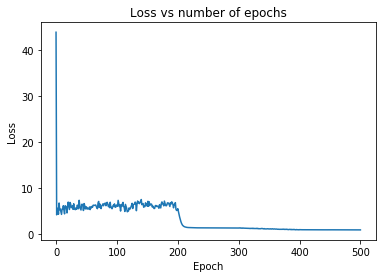

In [65]:
val_loss = [result] + history1 + history2 + history3 + history4 + history5
val_loss_array = [vl['val_loss'] for vl in val_loss]
plt.plot(val_loss_array)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs number of epochs')

Make predictions using the trained model

In [66]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [67]:
input, target = val_ds[0]
predict_single(input, target, model)

Input: tensor([ 50.0000,   0.0000,   2.0000, 120.0000, 219.0000,   0.0000,   1.0000,
        158.0000,   0.0000,   1.6000,   1.0000,   0.0000,   2.0000])
Target: tensor([1.])
Prediction: tensor([0.7557])


In [68]:
input, target = val_ds[5]
predict_single(input, target, model)

Input: tensor([ 46.,   0.,   0., 138., 243.,   0.,   0., 152.,   1.,   0.,   1.,   0.,
          2.])
Target: tensor([1.])
Prediction: tensor([-0.6686])


In [69]:
input, target = val_ds[10]
predict_single(input, target, model)

Input: tensor([ 43.,   1.,   0., 110., 211.,   0.,   1., 161.,   0.,   0.,   2.,   0.,
          3.])
Target: tensor([1.])
Prediction: tensor([0.2202])


In [70]:
input, target = val_ds[15]
predict_single(input, target, model)

Input: tensor([ 64.0000,   1.0000,   2.0000, 125.0000, 309.0000,   0.0000,   1.0000,
        131.0000,   1.0000,   1.8000,   1.0000,   0.0000,   3.0000])
Target: tensor([0.])
Prediction: tensor([1.3078])


In [71]:
input, target = val_ds[20]
predict_single(input, target, model)

Input: tensor([ 59.0000,   1.0000,   0.0000, 170.0000, 326.0000,   0.0000,   0.0000,
        140.0000,   1.0000,   3.4000,   0.0000,   0.0000,   3.0000])
Target: tensor([0.])
Prediction: tensor([-1.3148])


In [72]:
input, target = val_ds[23]
predict_single(input, target, model)

Input: tensor([ 39.,   0.,   2.,  94., 199.,   0.,   1., 179.,   0.,   0.,   2.,   0.,
          2.])
Target: tensor([1.])
Prediction: tensor([0.8125])


In [73]:
dummies.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
X = dummies.drop('target', axis=1)
y = dummies['target']

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
mm = MinMaxScaler((-1, 1))

In [78]:
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [79]:
#X_train

In [80]:
#X_test

In [81]:
#y_train

In [82]:
#y_test

In [83]:
X_train.shape

(212, 13)

In [84]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train.values).long()
y_test = torch.tensor(y_test.values).long()

In [85]:
class heart_disease(nn.Module):
    def __init__(self):
        super(heart_disease, self).__init__()
        self.fc1 = nn.Linear(13, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 2)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [86]:
net = heart_disease()

In [87]:
optim = optim.Adam(net.parameters())
criteria = nn.CrossEntropyLoss()

In [88]:
losses = []
for epoch in range(1, 201):
    optim.zero_grad()
    outputs = net(X_train)
    loss = criteria(outputs, y_train)
    loss.backward()
    optim.step()
    losses.append(loss.item())
    print("Epoch {}, Loss: {}".format(epoch, loss.item()))

Epoch 1, Loss: 0.6992336511611938
Epoch 2, Loss: 0.6872929930686951
Epoch 3, Loss: 0.6757164001464844
Epoch 4, Loss: 0.6643471121788025
Epoch 5, Loss: 0.653184711933136
Epoch 6, Loss: 0.6420553922653198
Epoch 7, Loss: 0.631005048751831
Epoch 8, Loss: 0.6199233531951904
Epoch 9, Loss: 0.6086366772651672
Epoch 10, Loss: 0.5971139073371887
Epoch 11, Loss: 0.5853741765022278
Epoch 12, Loss: 0.5733548402786255
Epoch 13, Loss: 0.5611408352851868
Epoch 14, Loss: 0.5487793684005737
Epoch 15, Loss: 0.5362980365753174
Epoch 16, Loss: 0.5237160921096802
Epoch 17, Loss: 0.5110995173454285
Epoch 18, Loss: 0.49857521057128906
Epoch 19, Loss: 0.48621296882629395
Epoch 20, Loss: 0.4741450250148773
Epoch 21, Loss: 0.4624674320220947
Epoch 22, Loss: 0.45127394795417786
Epoch 23, Loss: 0.4406476318836212
Epoch 24, Loss: 0.43066897988319397
Epoch 25, Loss: 0.42139914631843567
Epoch 26, Loss: 0.41290202736854553
Epoch 27, Loss: 0.4051891565322876
Epoch 28, Loss: 0.3981979787349701
Epoch 29, Loss: 0.3919071

In [89]:
predictions = net(X_test)
_, predictions_y = torch.max(predictions, 1)

In [90]:
acc = accuracy_score(y_test, predictions_y)*100
accuracies['PyTorch'] = acc
print("Test Accuracy of PyTorch Algorithm: {:.2f}%".format(acc))

Test Accuracy of PyTorch Algorithm: 78.02%


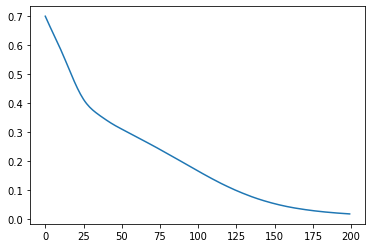

In [91]:
plt.plot(losses)

# Comparing Models

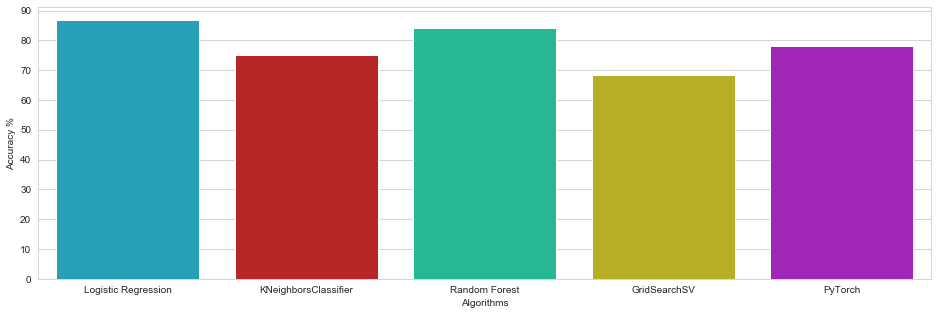

In [97]:
colors = ["#0eafcf", "#cf0e0e", "#0ecfa2","#cfc50e","#af0ecf"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [98]:
classifiers = ['Logistic Regression', 'KNeighborsClassifier', 'Random Forest', 'GridSearchSV', 'PyTorch']
summary = pd.DataFrame({'accuracy %': accuracies}, index=classifiers)       
summary

,accuracy %
Logistic Regression,86.842105
KNeighborsClassifier,75.000000
Random Forest,84.210526
GridSearchSV,68.421053
PyTorch,78.021978
